# Project Title-Stores Sales Prediction

### Domain Sales & Marketing


## Problem Statement

#### Nowadays, shopping malls and Big Marts keep track of individual item sales data in order to forecast future client demand and adjust inventory management. In a data warehouse, these data stores hold a significant amount of consumer information and particular item details. By mining the data store from the data warehouse, more anomalies and common patterns can be discovered.

# Data Definition

Item_Identifier : Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### 1. Import Libraries

In [1]:
##Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### 2. Read Data

In [3]:
Sales_Price_df=pd.read_csv("D:/DATA SCIENCE/I NEURON/STORE SALES PREDICTION/Train.csv")

In [4]:
Sales_Price_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Dimensions of the data

In [5]:
Sales_Price_df.info()
Sales_Price_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

### 3.Data Analysis and Preparation

#### Null Values

In [6]:
Sales_Price_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Statistical Description of data

In [7]:
Sales_Price_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Filling Null Values

In [8]:
Sales_Price_df["Item_Weight"].mean()

12.857645184136183

In [9]:
Sales_Price_df["Item_Weight"].median()

12.6

In [6]:
Sales_Price_df["Item_Weight"]=Sales_Price_df["Item_Weight"].fillna(Sales_Price_df["Item_Weight"].mean())

In [11]:
Sales_Price_df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [12]:
Sales_Price_df["Outlet_Size"].mode()

0    Medium
dtype: object

In [7]:
Sales_Price_df["Outlet_Size"]=Sales_Price_df["Outlet_Size"].fillna("Medium")

In [38]:
Sales_Price_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Analysing Target Variable

<function matplotlib.pyplot.show(close=None, block=None)>

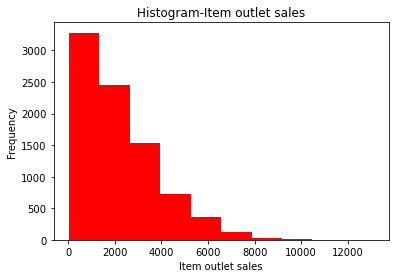

In [15]:
##Histogram
plt.hist(Sales_Price_df.Item_Outlet_Sales,color='red')
plt.xlabel('Item outlet sales')
plt.ylabel('Frequency')
plt.title('Histogram-Item outlet sales')
plt.show

In [16]:
Sales_Price_df["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### From the above statistical description we can clearly understnad There is a huge difference of Sales at minimum,1st qunatile, 3rd Quantile and maximum.

#### Box Plot

<AxesSubplot:>

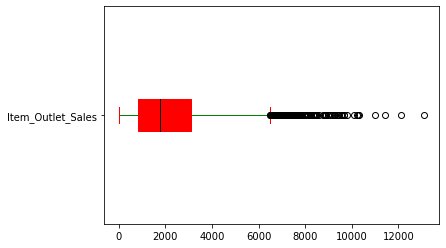

In [17]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
Sales_Price_df.Item_Outlet_Sales.plot.box(color=props2, patch_artist = True, vert = False)

#### Outliers Identification

In [18]:
IQR=Sales_Price_df.Item_Outlet_Sales.quantile(0.75)-Sales_Price_df.Item_Outlet_Sales.quantile(0.25)
LL=Sales_Price_df.Item_Outlet_Sales.quantile(0.25)-(1.5*IQR)
UL=Sales_Price_df.Item_Outlet_Sales.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  2267.049
LL:  -2566.3261
UL:  6501.8699


In [20]:
up_lim_len=len(Sales_Price_df.Item_Outlet_Sales[Sales_Price_df.Item_Outlet_Sales>UL])

In [22]:
UpperLimit_perc=up_lim_len/len(Sales_Price_df)
UpperLimit_perc

0.021823301654347062

In [23]:
Sales_Price_df.Item_Outlet_Sales.value_counts()
print(len(Sales_Price_df.Item_Outlet_Sales[Sales_Price_df.Item_Outlet_Sales <0])) 
print(len(Sales_Price_df.Item_Outlet_Sales[Sales_Price_df.Item_Outlet_Sales >1000]))
print(len(Sales_Price_df.Item_Outlet_Sales[Sales_Price_df.Item_Outlet_Sales >2000])) 
print(len(Sales_Price_df.Item_Outlet_Sales[Sales_Price_df.Item_Outlet_Sales >7000])) 


0
6019
3856
125


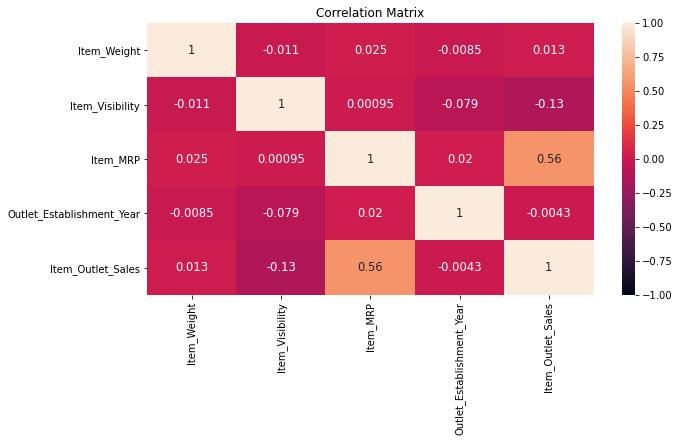

In [120]:
sns.heatmap(cormat,annot=True,vmax=+1,vmin=-1,annot_kws={"size":11.5})
plt.title("Correlation Matrix")
plt.show()

#### Value counts 

In [73]:
for i in range(0,12):
    print(Sales_Price_df.iloc[:,i].value_counts())
    print("*"*10)

FDW13    10
FDO19     9
FDX31     9
FDW49     9
FDF52     9
         ..
FDT35     1
FDE52     1
FDQ60     1
FDN52     1
DRE01     1
Name: Item_Identifier, Length: 1559, dtype: int64
**********
12.150    84
17.600    80
11.800    76
13.650    75
10.500    65
          ..
8.000      1
6.520      1
7.605      1
7.685      1
9.420      1
Name: Item_Weight, Length: 415, dtype: int64
**********
Low Fat    4850
Regular    2744
LF          301
reg         114
low fat     106
Name: Item_Fat_Content, dtype: int64
**********
0.000000    508
0.076975      3
0.162462      2
0.026895      2
0.134976      2
           ... 
0.168902      1
0.067021      1
0.026882      1
0.015334      1
0.041683      1
Name: Item_Visibility, Length: 7499, dtype: int64
**********
Fruits and Vegetables    1159
Snack Foods              1143
Household                 873
Frozen Foods              819
Dairy                     643
Canned                    621
Baking Goods              620
Health and Hygiene        502
Sof

In [8]:
from scipy.stats import f_oneway

In [9]:
import statsmodels.api as sm

In [10]:
from statsmodels.formula.api import ols

In [11]:
Sales_Price_df.info()
Sales_Price_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

### 1.Item_Identifier

In [122]:
Sales_Price_df.Item_Identifier.describe()

count      8398
unique     1559
top       FDG33
freq         10
Name: Item_Identifier, dtype: object

### FDW13 is the most repeated Item Identifier number. With frequency of 10.

In [261]:
Sales_Price_df.Item_Identifier.value_counts()

FDG33    10
FDW13    10
FDV38     9
NCI54     9
FDG09     9
         ..
FDY43     1
FDP15     1
FDN52     1
FDQ60     1
FDE52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [262]:
Sales_Price_df.groupby("Item_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Identifier,,,,,,,,
DRA12,6.0,1843.600200,1348.365430,283.6308,886.34625,1772.6925,2552.6772,3829.0158
DRA24,7.0,2246.218971,1951.090357,327.5736,737.04060,1146.5076,3930.8832,4913.6040
DRA59,7.0,1983.132857,1828.310353,185.0924,555.27720,1295.6468,3424.2094,4442.2176
DRB01,3.0,1518.024000,948.765000,569.2590,1043.64150,1518.0240,1992.4065,2466.7890
DRB13,5.0,2428.838400,1532.189383,569.2590,948.76500,3415.5540,3605.3070,3605.3070
...,...,...,...,...,...,...,...,...
NCZ30,7.0,1807.647000,1188.921454,241.0196,783.31370,2410.1960,2530.7058,3374.2744
NCZ41,5.0,1827.487840,604.198441,876.1928,1752.38560,1877.5560,2127.8968,2503.4080
NCZ42,5.0,3839.801760,1831.390489,711.0744,4029.42160,4266.4464,4740.4960,5451.5704


### 2.Item_Weight

In [263]:
Sales_Price_df.Item_Weight.value_counts()

12.857645    1384
12.150000      86
17.600000      81
11.800000      76
13.650000      76
             ... 
7.560000        2
9.420000        1
6.520000        1
5.400000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64

In [264]:
Sales_Price_df.groupby("Item_Weight")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,,,,,,,,
4.555,4.0,1761.706800,660.951300,1230.3984,1314.28920,1565.9616,2013.3792,2684.5056
4.590,5.0,1267.683200,303.709908,792.3020,1245.04600,1245.0460,1471.4180,1584.6040
4.610,7.0,1993.595429,1129.856762,174.4396,1395.51680,2093.2752,2616.5940,3663.2316
4.615,4.0,4078.025000,1117.572620,2563.3300,3611.96500,4311.0550,4777.1150,5126.6600
4.635,5.0,2184.489800,537.551557,1670.4922,1798.99160,1927.4910,2698.4874,2826.9868
...,...,...,...,...,...,...,...,...
21.000,6.0,1194.778100,310.399859,774.9912,1017.17595,1162.4868,1453.1085,1549.9824
21.100,17.0,1851.472306,986.996184,383.5008,1086.58560,1869.5664,2311.6576,3739.1328
21.200,5.0,2763.735800,1810.585045,529.3110,1911.51180,2954.1546,2954.1546,5469.5470


#### SCATTER PLOT

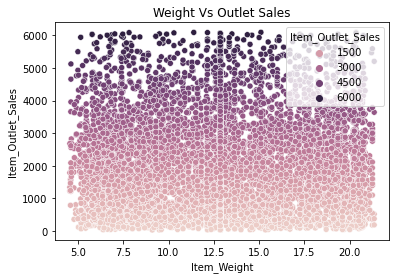

In [45]:
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",hue="Item_Outlet_Sales",data=Sales_Price_df)
plt.title("Weight Vs Outlet Sales")
plt.show()

In [60]:
Sales_Price_df.Item_Weight.describe()

count    8398.000000
mean       12.858072
std         4.245248
min         4.555000
25%         9.300000
50%        12.857645
75%        16.100000
max        21.350000
Name: Item_Weight, dtype: float64

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

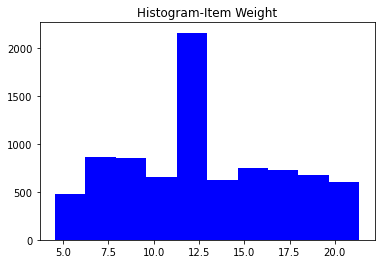

In [79]:
##Histogram
plt.hist(Sales_Price_df.Item_Weight,color='blue')
plt.title('Histogram-Item Weight')
plt.show

#### Box Plot

<AxesSubplot:>

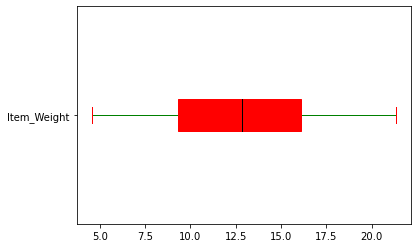

In [47]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
Sales_Price_df.Item_Weight.plot.box(color=props2, patch_artist = True, vert = False)

#### Outliers Identification

In [46]:
IQR=Sales_Price_df.Item_Weight.quantile(0.75)-Sales_Price_df.Item_Weight.quantile(0.25)
LL=Sales_Price_df.Item_Weight.quantile(0.25)-(1.5*IQR)
UL=Sales_Price_df.Item_Weight.quantile(0.75)+(1.5*IQR)

print("IQR: ",IQR)
print("LL: ",LL)
print("UL: ",UL)

IQR:  6.800000000000001
LL:  -0.9000000000000004
UL:  26.300000000000004


In [61]:
len(Sales_Price_df.Item_Weight[Sales_Price_df.Item_Weight>UL])

0

### 3.Item_Fat_Content

In [62]:
Sales_Price_df.Item_Fat_Content.describe()

count        8398
unique          5
top       Low Fat
freq         5012
Name: Item_Fat_Content, dtype: object

#### The most repeated selling product is the item with Low Fat content and has frequency of 5012 out of 8398 observations.

In [63]:
Sales_Price_df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
LF,315.0,2056.313789,1506.784566,40.6138,727.0536,1789.6704,2982.1182,6897.6880
Low Fat,5012.0,2073.271975,1545.250463,33.2900,810.9444,1737.0722,2980.7866,6976.2524
Regular,2844.0,2143.070906,1571.245776,33.9558,848.8950,1824.9578,3137.2496,6972.2576
low fat,111.0,2020.403090,1603.071964,83.8908,892.1720,1609.9044,2690.8307,6852.4136
reg,116.0,1911.574936,1449.037351,37.9506,797.2955,1483.4024,2781.7124,6002.8528


### Update types of Item_Fat_Content

We found typing error and difference in representation in categories of Item_Fat_Content variable.

In [12]:
Sales_Price_df['Item_Fat_Content'] =Sales_Price_df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(Sales_Price_df['Item_Fat_Content'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


#### COUNTPLOT

Text(0.5, 1.0, 'Item_Fat_Content counting')

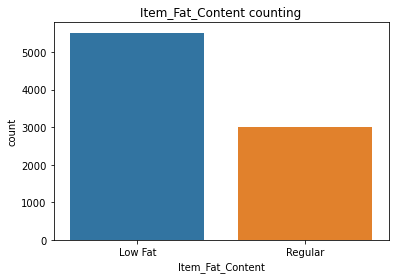

In [22]:
sns.countplot(x='Item_Fat_Content',data=Sales_Price_df)
plt.xlabel=("Item_Fat_Content")
plt.ylabel=("Counts")
#plt.rcParams['figure.figsize'] = [10.8]
plt.title("Item_Fat_Content counting")

In [40]:
Sales_Price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


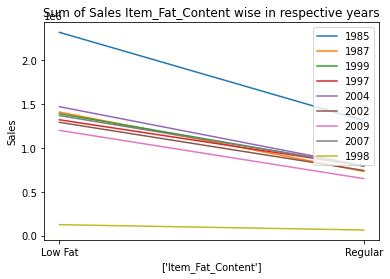

In [44]:
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1985].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1987].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1999].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1997].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2004].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2002].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2009].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2007].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1998].groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum())
plt.xlabel(['Item_Fat_Content'])
plt.ylabel('Sales')
plt.title('Sum of Sales Item_Fat_Content wise in respective years')
plt.legend([1985,1987,1999,1997,2004,2002,2009,2007,1998])
plt.show()

#### BARPLOT

<function matplotlib.pyplot.show(close=None, block=None)>

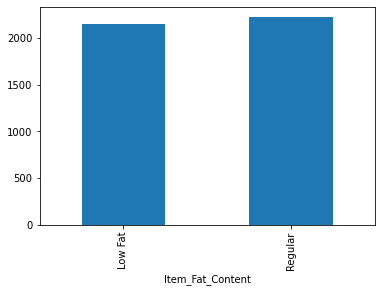

In [23]:
Sales_Price_df.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel="Item_Fat_Content"
plt.ylabel="Item_Outlet_Sales"
plt.show

#### PIE CHART

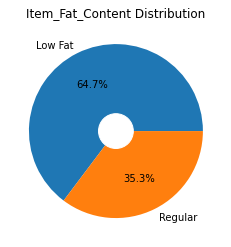

In [24]:
Frequency_by_Item=Sales_Price_df["Item_Fat_Content"].value_counts()
keys=Frequency_by_Item.keys().to_list()
counts=Frequency_by_Item.to_list()

plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.2,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Item_Fat_Content Distribution")
plt.show()
        

### 4.Item_Visibility

In [266]:
Sales_Price_df.Item_Visibility.value_counts()

0.000000    519
0.076975      3
0.106539      2
0.080766      2
0.074779      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.064909      1
Name: Item_Visibility, Length: 7766, dtype: int64

In [267]:
Sales_Price_df.Item_Visibility.describe()

count    8398.000000
mean        0.066236
std         0.051759
min         0.000000
25%         0.026982
50%         0.053864
75%         0.095023
max         0.328391
Name: Item_Visibility, dtype: float64

### Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

### Update Item_Visibility

We noticed that the minimum value in visibility is 0, which makes not practical. Lets consider it like missing information and replace it with mean visibility of that product.

In [13]:
 print(Sales_Price_df['Item_Visibility'].mean())    
    
Sales_Price_df['Item_Visibility'] = Sales_Price_df['Item_Visibility'].replace(0, 0.06978024245414721)
print ('Number of 0 values after modification: %d'%sum(Sales_Price_df['Item_Visibility'] == 0))

0.06613202877895127
Number of 0 values after modification: 0


In [11]:
Sales_Price_df.Item_Visibility.describe()

count    8398.000000
mean        0.066236
std         0.051759
min         0.000000
25%         0.026982
50%         0.053864
75%         0.095023
max         0.328391
Name: Item_Visibility, dtype: float64

#### HISTOGRAM

<function matplotlib.pyplot.show(close=None, block=None)>

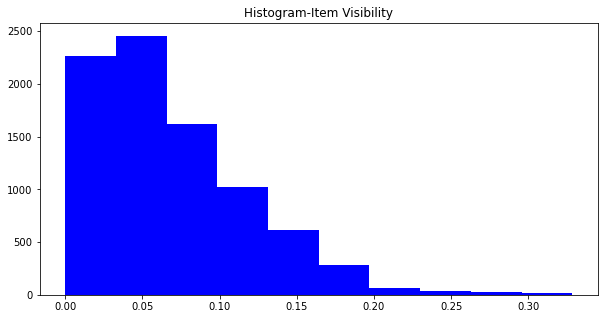

In [126]:
##Histogram
plt.hist(Sales_Price_df.Item_Visibility,color='blue')
plt.title('Histogram-Item Visibility')
plt.show

#### BOX PLOT

<AxesSubplot:>

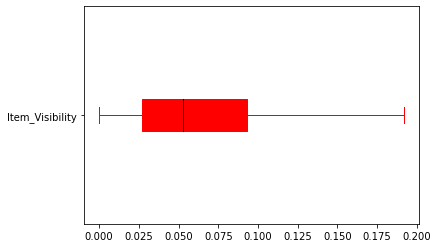

In [55]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
Sales_Price_df.Item_Visibility.plot.box(color=props2, patch_artist = True, vert = False)

#### SCATTER PLOT

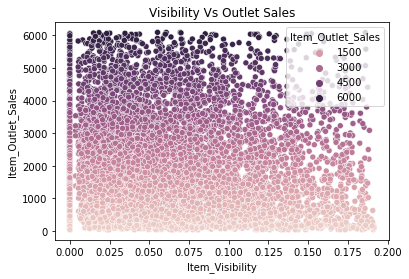

In [56]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",hue="Item_Outlet_Sales",data=Sales_Price_df)
plt.title("Visibility Vs Outlet Sales")
plt.show()

### 5.Item_Type

In [63]:
Sales_Price_df.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,620.0,1909.710918,1407.323183,37.2848,777.65440,1618.5598,2799.02320,6093.4016
Breads,240.0,2066.110560,1399.340669,83.8908,968.73900,1845.5976,3057.52005,5816.4288
Breakfast,99.0,1829.288863,1415.353789,50.6008,686.10690,1518.0240,2716.46400,6006.1818
Canned,621.0,2124.227931,1443.101503,37.9506,988.04720,1844.2660,2984.11560,6066.7696
Dairy,643.0,2044.491630,1528.305165,40.6138,793.63360,1601.2490,3106.95570,6079.4198
Frozen Foods,819.0,2013.793801,1506.774062,36.6190,818.60110,1684.4740,2951.15850,6088.0752
Fruits and Vegetables,1159.0,2126.507754,1487.343698,45.2744,912.14600,1807.6470,3090.97650,6096.0648
Hard Drinks,204.0,2009.188576,1370.139713,37.9506,834.91320,1745.7276,3036.71380,6050.7904
Health and Hygiene,502.0,1896.373471,1331.520570,34.6216,759.67780,1655.8446,2780.38080,6072.0960


### Grouping Item type
We can observe that the Item_Type variable has 16 categories. If you look at the Item_Identifier, i.e. the unique ID of each item, it starts with either FD, DR or NC. If you see the categories, these look like being Food, Drinks and Non-Consumables. So I added the Item_Type_Identifier variable column:

In [14]:
Sales_Price_df['Item_Type_Combined'] = Sales_Price_df['Item_Identifier'].apply(lambda x: x[0:2])

Sales_Price_df['Item_Type_Combined'] = Sales_Price_df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
Sales_Price_df['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

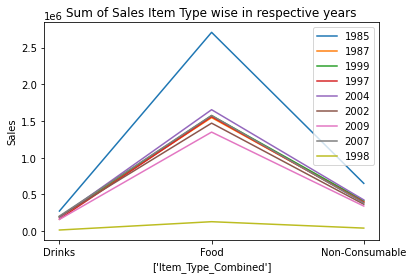

In [48]:
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1985].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1987].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1999].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1997].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2004].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2002].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2009].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==2007].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.plot(Sales_Price_df[Sales_Price_df.Outlet_Establishment_Year==1998].groupby('Item_Type_Combined')['Item_Outlet_Sales'].sum())
plt.xlabel(['Item_Type_Combined'])
plt.ylabel('Sales')
plt.title('Sum of Sales Item Type wise in respective years')
plt.legend([1985,1987,1999,1997,2004,2002,2009,2007,1998])
plt.show()

#### COUNT PLOT

Text(0.5, 1.0, 'Item type wise counting')

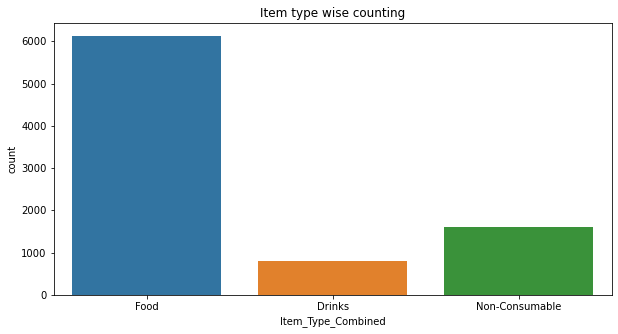

In [31]:
sns.countplot(x="Item_Type_Combined", data=Sales_Price_df)
plt.rcParams['figure.figsize'] = [10,5]
plt.xlabel=("Item Type")
plt.ylabel=('counts')
plt.title("Item type wise counting")


#### PIE CHART

In [36]:
Frequency_by_Item=Sales_Price_df["Item_Type_Combined"].value_counts()

In [37]:
keys=Frequency_by_Item.keys().to_list()
counts=Frequency_by_Item.to_list()


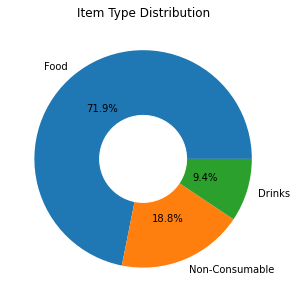

In [38]:
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.4,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("Item Type Distribution")
plt.show()
        

##### Food Items are most sold item types.

### 6.Outlet_Identifier

In [84]:
Sales_Price_df.Outlet_Identifier.describe()

count       8398
unique        10
top       OUT018
freq         928
Name: Outlet_Identifier, dtype: object

In [86]:
Sales_Price_df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,926.0,2260.921627,1460.583478,73.2380,1069.60770,2037.0151,3141.24440,6897.6880
OUT017,914.0,2267.291573,1418.218692,143.8128,1176.96795,1983.4182,3070.50315,6849.0846
OUT018,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,856.0,3275.508104,1652.852525,241.6854,1913.50920,3179.5279,4487.65845,6976.2524
OUT035,921.0,2389.427522,1461.349640,113.8518,1235.72480,2094.6068,3263.08580,6911.0040
OUT045,923.0,2152.944730,1381.479469,99.8700,1063.94840,1821.6288,2904.21960,6851.0820
OUT046,923.0,2234.377913,1405.420685,101.8674,1126.86650,1926.1594,3078.65920,6893.0274


#### OUT019 and OUT010 are having less outlet sales among 10 Outlet identifiers.

#### BAR PLOT

<function matplotlib.pyplot.show(close=None, block=None)>

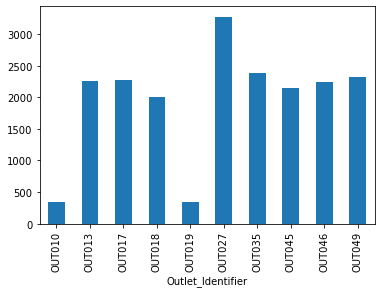

In [94]:
Sales_Price_df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel="Outlet_Identifier"
plt.ylabel="Item_Outlet_Sales"
plt.show

#### COUNT PLOT

Text(0.5, 1.0, 'Outlet_Identifier counting')

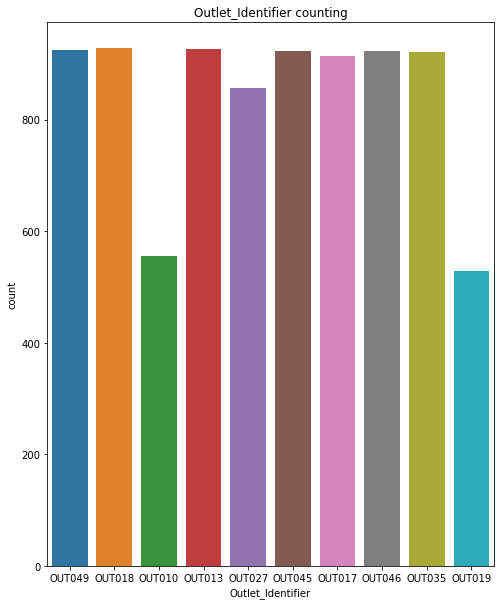

In [109]:
sns.countplot(x='Outlet_Identifier',data=Sales_Price_df)
plt.xlabel=("Item_Fat_Content")
plt.ylabel=("Counts")
plt.rcParams['figure.figsize'] = [8,10]
plt.title("Outlet_Identifier counting")

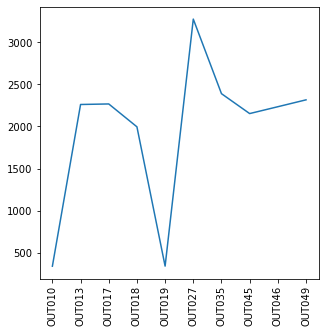

In [143]:
plt.plot(Sales_Price_df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean())
plt.rcParams['figure.figsize'] = [5,5]
plt.xticks(rotation=90)

plt.show()

### 7.Item_MRP

In [108]:
Sales_Price_df.Item_MRP.value_counts()

172.0422    7
109.5228    6
142.0154    6
196.5084    6
170.5422    6
           ..
154.3972    1
160.4604    1
244.4170    1
231.8300    1
51.3008     1
Name: Item_MRP, Length: 5867, dtype: int64

#### Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

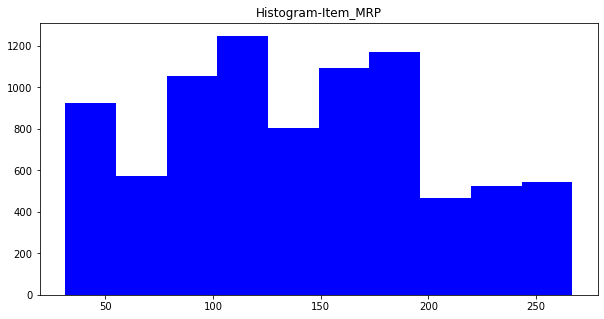

In [120]:
##Histogram
plt.hist(Sales_Price_df.Item_MRP,color='blue')
plt.xlabel=("Item_MRP")
plt.title('Histogram-Item_MRP')
plt.rcParams['figure.figsize'] = [10,5]
plt.show

#### BOX PLOT

<AxesSubplot:>

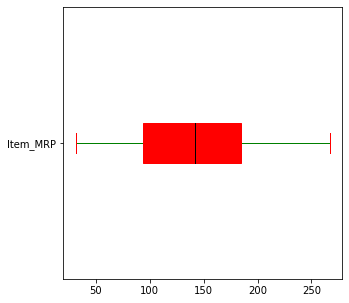

In [328]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
Sales_Price_df.Item_MRP.plot.box(color=props2, patch_artist = True, vert = False)

#### SCATTER PLOT

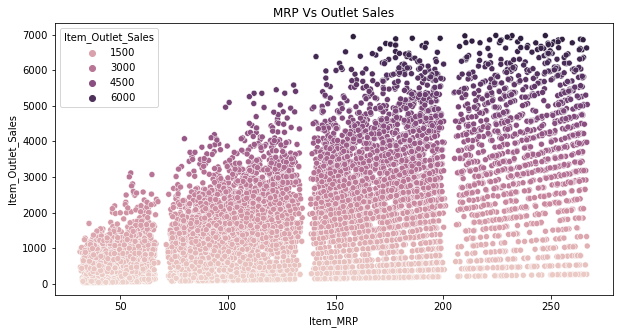

In [121]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",hue="Item_Outlet_Sales",data=Sales_Price_df)
plt.title("MRP Vs Outlet Sales")
plt.rcParams['figure.figsize'] = [10,5]
plt.show()

### 8.Outlet_Establishment_Year

In [14]:
Sales_Price_df.Outlet_Establishment_Year.value_counts()

1985    1256
2009     917
1997     916
1987     914
2002     914
1999     908
2004     905
2007     902
1998     483
Name: Outlet_Establishment_Year, dtype: int64

In [18]:
Sales_Price_df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Establishment_Year,,,,,,,,
1985,1256.0,2108.301818,1787.102164,33.9558,400.81160,1721.7588,3488.12620,6072.0960
1987,914.0,2203.473841,1380.520397,73.2380,1054.46075,2004.3909,3098.63320,6093.4016
1997,916.0,2202.193102,1361.285838,101.8674,1119.54270,1922.8304,3056.35490,6096.0648
1998,483.0,341.978590,274.415030,33.2900,154.46560,249.0092,463.39680,1775.6886
1999,908.0,2243.567085,1369.575385,111.8544,1165.98225,1928.4897,3143.57470,6050.7904
2002,914.0,2110.058605,1318.319616,99.8700,1062.61680,1802.9864,2865.10385,6048.7930
2004,905.0,2317.216478,1368.223549,113.8518,1228.40100,2073.3012,3171.87120,6088.0752
2007,902.0,2210.416879,1338.225588,143.8128,1170.97575,1965.1087,3010.74760,6076.0908
2009,917.0,1942.442821,1295.288161,69.2432,974.06540,1631.8758,2647.22080,6042.1350


#### Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

In [122]:
Sales_Price_df.Outlet_Establishment_Year.describe()

count    8398.000000
mean     1997.937485
std         8.325306
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

#### BOX PLOT

<AxesSubplot:>

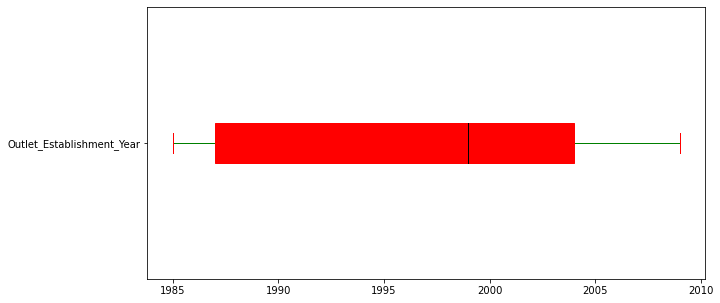

In [124]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
Sales_Price_df.Outlet_Establishment_Year.plot.box(color=props2, patch_artist = True, vert = False)

#### COUNT PLOT

Text(0.5, 1.0, 'Outlet_Establishment_Year counting')

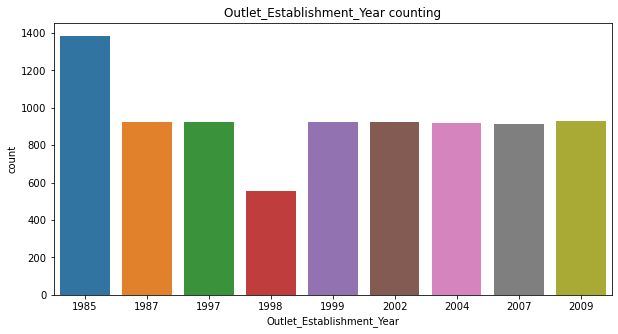

In [125]:
sns.countplot(x='Outlet_Establishment_Year',data=Sales_Price_df)
plt.xlabel=("Outlet Establishment Year")
plt.ylabel=('Counts')
plt.rcParams['figure.figsize'] = [5,10]
plt.title("Outlet_Establishment_Year counting")

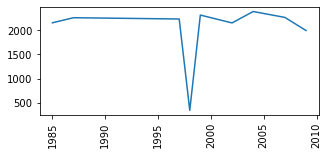

In [150]:
plt.plot(Sales_Price_df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean())
plt.rcParams['figure.figsize'] = [5,2]
plt.xticks(rotation=90)

plt.show()

### We shall add column having values of stores working years as "Outlet_Years"

In [15]:
Sales_Price_df['Outlet_Years'] = 2009 - Sales_Price_df['Outlet_Establishment_Year']
Sales_Price_df['Outlet_Years'].describe()

count    8523.000000
mean       11.168133
std         8.371760
min         0.000000
25%         5.000000
50%        10.000000
75%        22.000000
max        24.000000
Name: Outlet_Years, dtype: float64

Text(0.5, 1.0, 'Outlet_Years counting')

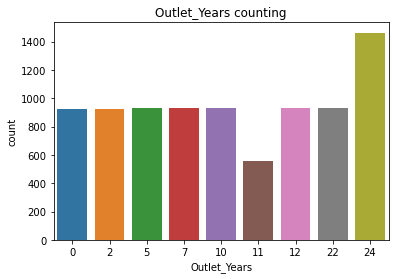

In [50]:
sns.countplot(x='Outlet_Years',data=Sales_Price_df)
plt.xlabel=("Outlet_Years")
plt.ylabel=('Counts')
plt.rcParams['figure.figsize'] = [5,10]
plt.title("Outlet_Years counting")

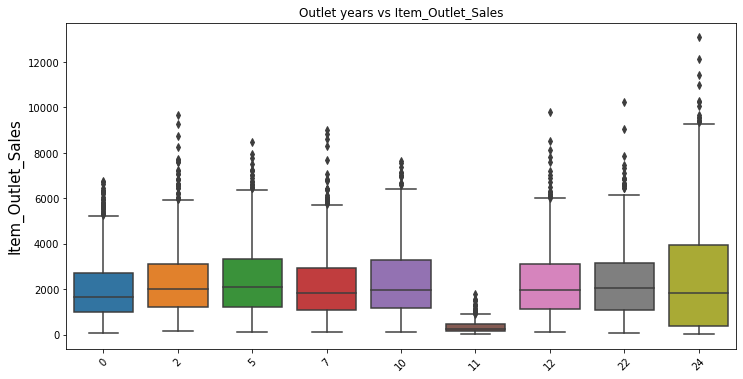

In [41]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = Sales_Price_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()


In [127]:
Sales_Price_df.Outlet_Size.value_counts()
Sales_Price_df.Outlet_Size.describe()

count       8398
unique         3
top       Medium
freq        5100
Name: Outlet_Size, dtype: object

### 9.Outlet_Size

In [125]:
Sales_Price_df.groupby("Outlet_Size")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
High,926.0,2260.921627,1460.583478,73.2380,1069.6077,2037.0151,3141.2444,6897.6880
Medium,5100.0,2165.407450,1576.251498,33.2900,886.8456,1812.3076,3115.9440,6976.2524
Small,2372.0,1872.971187,1512.670010,33.9558,594.8923,1536.0006,2807.3457,6911.0040


#### BAR PLOT

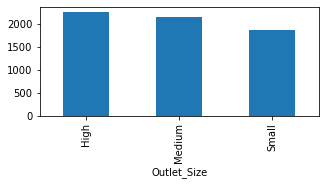

In [136]:
Sales_Price_df.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel="Outlet_Size"
plt.ylabel="Item_Outlet_Sales"
plt.show
plt.rcParams['figure.figsize'] = [5,5]

Let us assign numerical values to Outlet_Size

In [16]:
#Creating dict file
Outlet_Size = {'High':1, 'Medium':2, 'Small':3}
#Converting Size names to numbers
Sales_Price_df.Outlet_Size = [Outlet_Size[item] for item in Sales_Price_df.Outlet_Size]

In [285]:
Sales_Price_df.groupby("Outlet_Size")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Size,,,,,,,,
1,926.0,2260.921627,1460.583478,73.2380,1069.6077,2037.0151,3141.2444,6897.6880
2,5100.0,2165.407450,1576.251498,33.2900,886.8456,1812.3076,3115.9440,6976.2524
3,2372.0,1872.971187,1512.670010,33.9558,594.8923,1536.0006,2807.3457,6911.0040


### 10.Outlet_Location_Type

In [286]:
Sales_Price_df.Outlet_Location_Type.describe()

count       8398
unique         3
top       Tier 3
freq        3265
Name: Outlet_Location_Type, dtype: object

In [152]:
Sales_Price_df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Location_Type,,,,,,,,
Tier 1,2375.0,1845.108412,1504.411602,33.9558,591.8962,1471.4180,2772.7241,6972.2576
Tier 2,2758.0,2269.809728,1423.476661,99.8700,1162.8197,1985.0827,3075.9960,6911.0040
Tier 3,3265.0,2124.842685,1664.227607,33.2900,717.7324,1751.0540,3185.1872,6976.2524


#### BAR PLOT

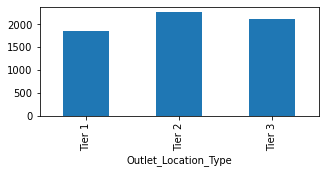

In [153]:
Sales_Price_df.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel="Outlet_Location_Type"
plt.ylabel="Item_Outlet_Sales"
plt.show
plt.rcParams['figure.figsize'] = [5,5]

Let us assign numerical values to Outlet_Location_Type

In [17]:
#Creating dict file
Outlet_Location_Type = {'Tier 1':1, 'Tier 2':2, 'Tier 3':3}
#Converting Size names to numbers
Sales_Price_df.Outlet_Location_Type = [Outlet_Location_Type[item] for item in Sales_Price_df.Outlet_Location_Type]

### 11.Outlet_Type

In [133]:
Sales_Price_df.Outlet_Type.describe()

count                  8398
unique                    4
top       Supermarket Type1
freq                   5531
Name: Outlet_Type, dtype: object

In [155]:
Sales_Price_df.groupby("Outlet_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Type,,,,,,,,
Grocery Store,1083.0,339.828500,260.851582,33.2900,153.79980,256.9988,458.73620,1775.6886
Supermarket Type1,5531.0,2270.147721,1433.427864,73.2380,1150.50240,1973.4312,3103.95960,6972.2576
Supermarket Type2,928.0,1995.498739,1375.932889,69.2432,981.55565,1655.1788,2702.64865,6768.5228
Supermarket Type3,856.0,3275.508104,1652.852525,241.6854,1913.50920,3179.5279,4487.65845,6976.2524


#### COUNT PLOT

Text(0.5, 1.0, 'Outlet_Type counting')

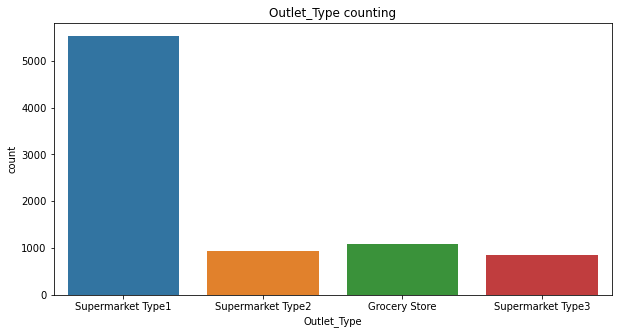

In [164]:
sns.countplot(x='Outlet_Type',data=Sales_Price_df)
plt.xlabel=("Outlet_Type")
plt.ylabel=('Counts')
plt.rcParams['figure.figsize'] = [10,5]
plt.title("Outlet_Type counting")

#### BAR PLOT

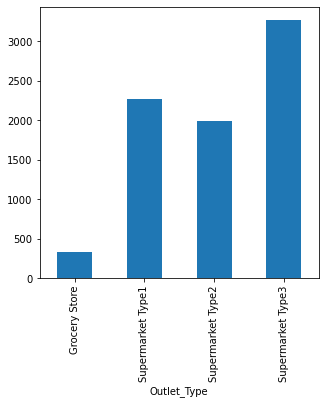

In [166]:
Sales_Price_df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().plot(kind="bar")
plt.xlabel="Outlet_Type"
plt.ylabel="Item_Outlet_Sales"
plt.show
plt.rcParams['figure.figsize'] = [5,2]

#### BOX PLOT OF Outlet_Size,Outlet_Location_Type,Outlet_Type WITH Item_Outlet_Sales

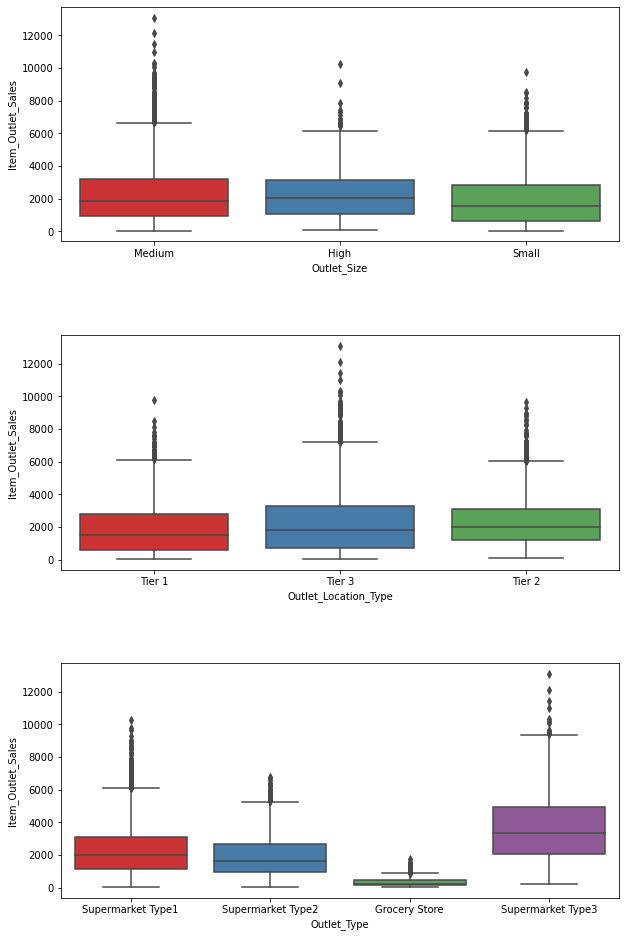

In [53]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=Sales_Price_df, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=Sales_Price_df, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=Sales_Price_df, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

In [18]:
Sales_Price_df['Outlet_Size'] =Sales_Price_df['Outlet_Size'].replace([1,2],['MS Combined Size','MS Combined Size'])


In [19]:
Sales_Price_df['Outlet_Location_Type'] =Sales_Price_df['Outlet_Location_Type'].replace(['Tier 1','Tier 3'],['1,3 Combined Tier','1,3 Combined Tier'])


In [20]:
Sales_Price_df['Outlet_Type'] =Sales_Price_df['Outlet_Type'].replace(['Supermarket Type1','Supermarket Type2'],['1,2 Combined Type','1,2 Combined Type'])


#### BOX PLOT OF Outlet_Identifier,Item_Type_Combined WITH Item_Outlet_Sales

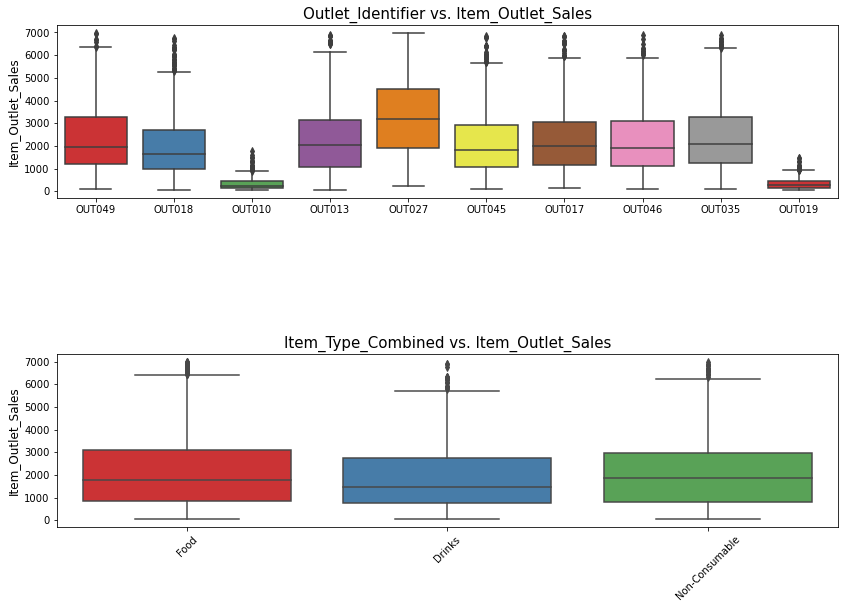

In [135]:

plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=Sales_Price_df, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=Sales_Price_df, palette="Set1")
ax.set_title("Item_Type_Combined vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

### Statistical Hypothesis Tests for consideration of the effective columns

In [21]:
mod=ols("Item_Outlet_Sales~Item_Fat_Content",data=Sales_Price_df).fit()
aov_table=sm.stats.anova_lm(mod,type=2)
print(aov_table)

                      df        sum_sq       mean_sq         F    PR(>F)
Item_Fat_Content     1.0  8.695560e+06  8.695560e+06  2.986664  0.083989
Residual          8521.0  2.480857e+10  2.911462e+06       NaN       NaN


In [22]:
mod1=ols("Item_Outlet_Sales~Outlet_Size",data=Sales_Price_df).fit()
aov_table1=sm.stats.anova_lm(mod1,type=2)
print(aov_table1)

                 df        sum_sq       mean_sq         F        PR(>F)
Outlet_Size     1.0  2.403078e+08  2.403078e+08  83.31638  8.601345e-20
Residual     8521.0  2.457696e+10  2.884281e+06       NaN           NaN


In [23]:
mod3=ols("Item_Outlet_Sales~Item_Type",data=Sales_Price_df).fit()
aov_table2=sm.stats.anova_lm(mod3,type=2)
print(aov_table2)

               df        sum_sq       mean_sq         F    PR(>F)
Item_Type    15.0  1.176182e+08  7.841211e+06  2.700653  0.000388
Residual   8507.0  2.469965e+10  2.903450e+06       NaN       NaN


In [24]:
mod4=ols("Item_Outlet_Sales~Outlet_Identifier",data=Sales_Price_df).fit()
aov_table3=sm.stats.anova_lm(mod4,type=2)
print(aov_table3)

                       df        sum_sq       mean_sq           F  PR(>F)
Outlet_Identifier     9.0  5.976994e+09  6.641104e+08  300.079135     0.0
Residual           8513.0  1.884027e+10  2.213118e+06         NaN     NaN


In [25]:
mod5=ols("Item_Outlet_Sales~Outlet_Location_Type",data=Sales_Price_df).fit()
aov_table4=sm.stats.anova_lm(mod5,type=2)
print(aov_table4)

                          df        sum_sq       mean_sq          F  \
Outlet_Location_Type     1.0  8.423937e+07  8.423937e+07  29.022072   
Residual              8521.0  2.473303e+10  2.902597e+06        NaN   

                            PR(>F)  
Outlet_Location_Type  7.346768e-08  
Residual                       NaN  


In [26]:
mod6=ols("Item_Outlet_Sales~Outlet_Type",data=Sales_Price_df).fit()
aov_table5=sm.stats.anova_lm(mod6,type=2)
print(aov_table5)


                 df        sum_sq       mean_sq           F  PR(>F)
Outlet_Type     2.0  5.863785e+09  2.931893e+09  1317.94922     0.0
Residual     8520.0  1.895348e+10  2.224587e+06         NaN     NaN


In [65]:
cormat=Sales_Price_df.corr()
cormat

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
Item_Weight,1.000000,-0.017713,0.024756,-0.008301,0.011550,0.008301
Item_Visibility,-0.017713,1.000000,-0.005473,-0.078325,-0.134056,0.078325
Item_MRP,0.024756,-0.005473,1.000000,0.005020,0.567574,-0.005020
Outlet_Establishment_Year,-0.008301,-0.078325,0.005020,1.000000,-0.049135,-1.000000
Item_Outlet_Sales,0.011550,-0.134056,0.567574,-0.049135,1.000000,0.049135
Outlet_Years,0.008301,0.078325,-0.005020,-1.000000,0.049135,1.000000


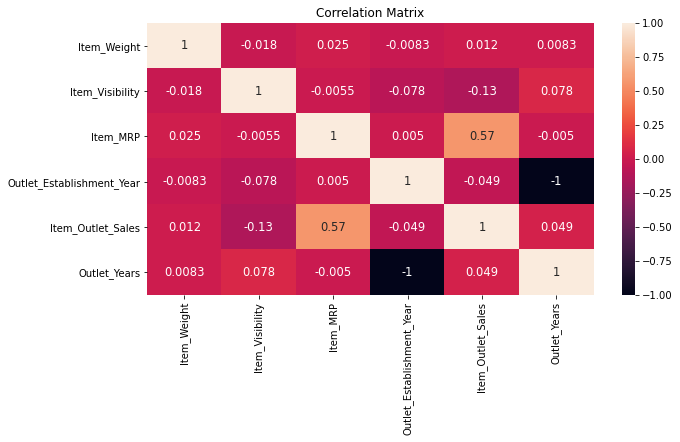

In [67]:
plt.rcParams['figure.figsize'] = [10,5]
sns.heatmap(cormat,annot=True,vmax=+1,vmin=-1,annot_kws={"size":11.5})
plt.title("Correlation Matrix")
plt.show()

In [57]:
Sales_Price_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,MS Combined Size,"1,2 Combined Tier","1,2 Combined Type",3735.1380,Food,10
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,MS Combined Size,"1,2 Combined Tier","1,2 Combined Type",443.4228,Drinks,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,MS Combined Size,"1,2 Combined Tier","1,2 Combined Type",2097.2700,Food,10
3,FDX07,19.20,Regular,0.069780,Fruits and Vegetables,182.0950,OUT010,1998,MS Combined Size,"1,2 Combined Tier",Grocery Store,732.3800,Food,11
4,NCD19,8.93,Low Fat,0.069780,Household,53.8614,OUT013,1987,High,"1,2 Combined Tier","1,2 Combined Type",994.7052,Non-Consumable,22


In [98]:
DF=Sales_Price_df.copy()

In [99]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Type_Combined         8523 non-null   object 
 13  Outlet_Years               8523 non-null   int64

In [100]:
DF.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1,inplace=True)

In [101]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Size           8523 non-null   object 
 5   Outlet_Location_Type  8523 non-null   object 
 6   Outlet_Type           8523 non-null   object 
 7   Item_Outlet_Sales     8523 non-null   float64
 8   Item_Type_Combined    8523 non-null   object 
 9   Outlet_Years          8523 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [71]:
numerical_variables=DF.select_dtypes(include=np.number)


In [72]:
numerical_variables.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Outlet_Years'], dtype='object')

#### PAIR PLOT

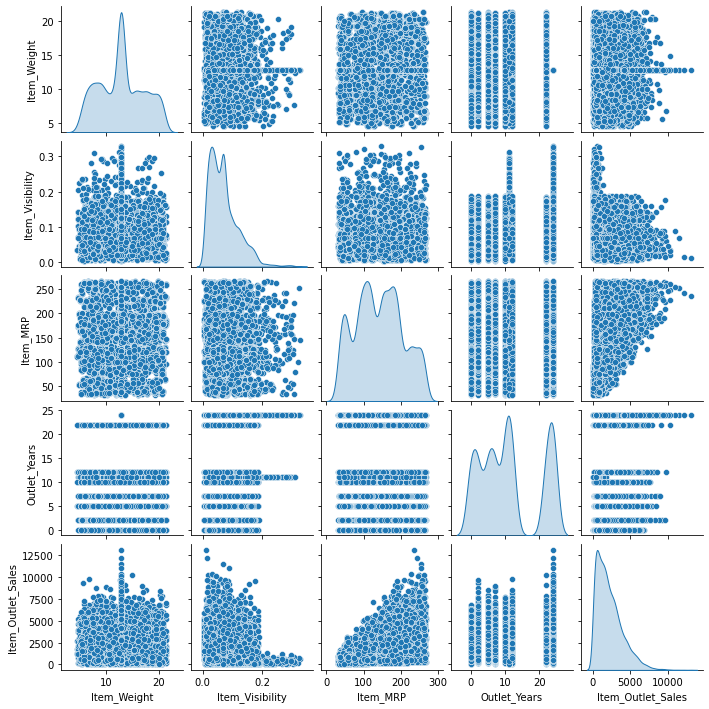

In [73]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Item_Weight", "Item_Visibility", "Item_MRP", "Outlet_Years", "Item_Outlet_Sales"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(DF[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

### 5.SGD REGRESSION

In [34]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Seperating numerical and categorical variables

In [73]:
numerical_variables=DF.select_dtypes(include=np.number)


In [74]:
categorical_variables=DF.select_dtypes(include="object")

In [75]:
dummy_enc_cat=pd.get_dummies(categorical_variables,drop_first=True)

In [76]:
dummy_enc_cat.shape

(8523, 6)

In [77]:
dummy_sales_df=pd.concat([numerical_variables,dummy_enc_cat],axis=1)

In [78]:
dummy_sales_df.head()

,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Size_MS Combined Size,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,249.8092,3735.1380,10,1,0,0,0,1,0
1,48.2692,443.4228,0,1,0,0,0,0,0
2,141.6180,2097.2700,10,1,0,0,0,1,0
3,182.0950,732.3800,11,1,0,1,0,1,0
4,53.8614,994.7052,22,1,0,0,0,0,1


In [79]:
x=dummy_sales_df.drop(["Item_Outlet_Sales"],axis=1)

In [80]:
y=dummy_sales_df[["Item_Outlet_Sales"]]

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 8)
(2131, 8)
(6392, 1)
(2131, 1)


In [82]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor()
Linear_reg_SGD_model=sgdr.fit(x_train,y_train)
print(Linear_reg_SGD_model)

SGDRegressor()


In [83]:
score_SGD=sgdr.score(x_train,y_train)
print(score_SGD)

0.558691241506996


In [84]:
Linear_reg_model_SGD_predict=Linear_reg_SGD_model.predict(x_test)

In [85]:
Linear_reg_model_SGD_predict

array([2572.76345661, 2477.59259605, 2070.82242314, ..., 2715.75463237,
        842.0939264 , 2424.61616897])

In [86]:
actual_Linear_reg_SGD_model=y_test

In [87]:
SGD_msme=mean_squared_error(actual_Linear_reg_SGD_model,Linear_reg_model_SGD_predict)
SGD_rmse=np.sqrt(SGD_msme)
print(SGD_msme)
print(SGD_rmse)

1320763.3889237926
1149.244703674458


### 6. Linear Regression (OLS)

In [95]:
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [92]:

linreg_OLSmodel_full_rsquared = linreg_OLSmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_OLSmodel_full_rsquared_adj = linreg_OLSmodel_full.rsquared_adj 

In [93]:
print(linreg_OLSmodel_full_rsquared)
print(linreg_OLSmodel_full_rsquared_adj)

0.21170327388926957
0.21071543338035892


### 7.DECISION TREE & RANDOMFOREST

In [152]:
#Decision Tree
clf = tree.DecisionTreeRegressor()
tf_clf = clf.fit(x_train, y_train)


In [153]:
#Prediction
y_pred = tf_clf.predict(x_test)
print(y_pred)

[-1.19364608  0.58627824 -1.32170437 ...  2.48394743 -0.97620481
  0.56951894]


In [154]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

0.8931169048711889


In [155]:
rfr = RandomForestRegressor(n_estimators = 150) 
tf_rfr = rfr.fit(x_train, y_train)

In [156]:
#Prediction
y_Pred = tf_rfr.predict(x_test)

#RMSE
from sklearn.metrics import mean_squared_error
RF_mse = mean_squared_error(y_test, y_Pred)
RF_RMSE = np.sqrt(RF_mse)
print(RF_RMSE) 

0.66487581696659


### 8. RESULT TABULATION

In [326]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model',  'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
Result = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear_reg_model_SGD ",
                     'R-Squared': score_SGD   
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
Result = Result.append(linreg_full_metrics, ignore_index = True)

# print the result table
Result

,Model,R-Squared
0,Linear_reg_model_SGD,0.553783


In [327]:
linreg_full_metrics = pd.Series({'Model': "Linear_reg_model_OLS",
                     'R-Squared':linreg_OLSmodel_full_rsquared 
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
Result = Result.append(linreg_full_metrics, ignore_index = True)

# print the result table
Result

,Model,R-Squared
0,Linear_reg_model_SGD,0.553783
1,Linear_reg_model_OLS,0.559468
